# CIFAR 10 - Functional API Modeling

* Categorical Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.10.0'

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

* Train_Data Information

In [4]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [5]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


# II. Data Preprocessing

> ## 1) Normalization

In [6]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

> ## 3) train_test_split( )

* Train(40,000) vs. Validation(10,000)

In [8]:
from sklearn.model_selection import train_test_split 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((40000, 32, 32, 3), (40000, 10), (10000, 32, 32, 3), (10000, 10))

# III. Keras Functional API Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의

In [9]:
# %%time

from tensorflow.keras import models
from tensorflow.keras import layers

input_img = layers.Input((32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid')(input_img)
x = layers.ReLU()(x)

x = layers.MaxPool2D(pool_size=(2,2))(x)

x = layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid')(x)
x = layers.ReLU()(x)

x = layers.MaxPool2D(pool_size=(2,2))(x)

x = layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid')(x)
x = layers.ReLU()(x)


x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64)(x)
x = layers.ReLU()(x)

x = layers.Dense(10)(x)
output_y_hat = layers.Activation('softmax')(x)

CIFAR = models.Model(input_img, output_y_hat)

* 모델 구조 확인

In [10]:
CIFAR.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 re_lu (ReLU)                (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 re_lu_1 (ReLU)              (None, 13, 13, 64)        0         
                                                             

> ## 2) Model Compile

* 모델 학습방법 설정

In [11]:
CIFAR.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 5분

In [12]:
# %%time

Hist_CIFAR = CIFAR.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
313/313 [==============================] - 8s 4ms/step - loss: 1.7423 - accuracy: 0.3558 - val_loss: 1.4421 - val_accuracy: 0.4768
Epoch 2/100
313/313 [==============================] - 1s 3ms/step - loss: 1.4028 - accuracy: 0.4919 - val_loss: 1.2944 - val_accuracy: 0.5305
Epoch 3/100
313/313 [==============================] - 1s 3ms/step - loss: 1.2797 - accuracy: 0.5401 - val_loss: 1.1644 - val_accuracy: 0.5826
Epoch 4/100
313/313 [==============================] - 1s 3ms/step - loss: 1.1921 - accuracy: 0.5754 - val_loss: 1.1024 - val_accuracy: 0.6066
Epoch 5/100
313/313 [==============================] - 1s 3ms/step - loss: 1.1239 - accuracy: 0.6015 - val_loss: 1.0435 - val_accuracy: 0.6374
Epoch 6/100
313/313 [==============================] - 1s 3ms/step - loss: 1.0679 - accuracy: 0.6228 - val_loss: 1.0196 - val_accuracy: 0.6445
Epoch 7/100
313/313 [==============================] - 1s 3ms/step - loss: 1.0169 - accuracy: 0.6421 - val_loss: 0.9479 - val_accuracy: 0.6613

Epoch 58/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4581 - accuracy: 0.8352 - val_loss: 0.7629 - val_accuracy: 0.7594
Epoch 59/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4529 - accuracy: 0.8364 - val_loss: 0.8128 - val_accuracy: 0.7488
Epoch 60/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4558 - accuracy: 0.8367 - val_loss: 0.7810 - val_accuracy: 0.7528
Epoch 61/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4558 - accuracy: 0.8377 - val_loss: 0.7745 - val_accuracy: 0.7533
Epoch 62/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4478 - accuracy: 0.8365 - val_loss: 0.7527 - val_accuracy: 0.7613
Epoch 63/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4414 - accuracy: 0.8406 - val_loss: 0.7600 - val_accuracy: 0.7589
Epoch 64/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4377 - accuracy: 0.8429 - val_loss: 0.8058 - val_accuracy:

> ## 4) 학습 결과 시각화

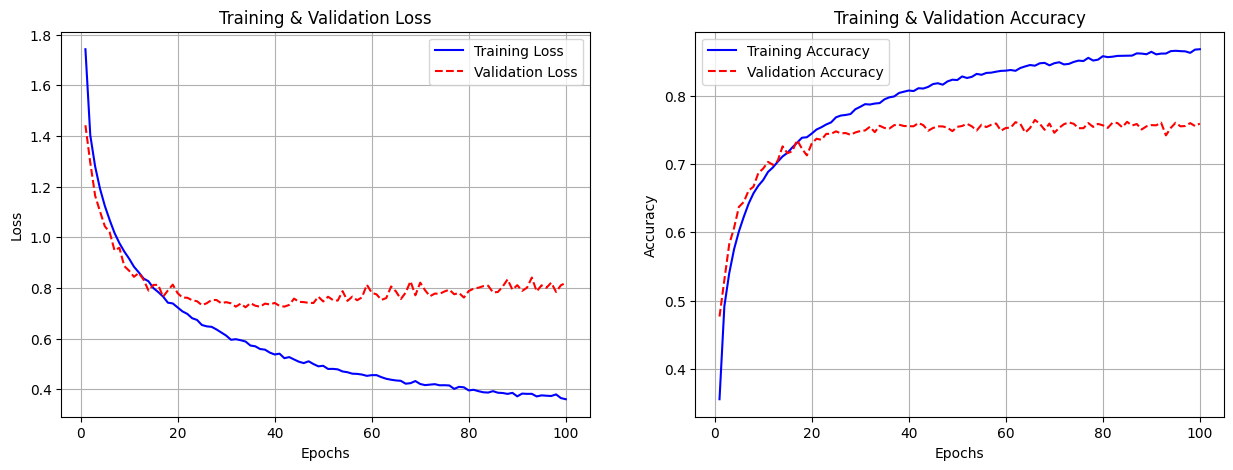

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CIFAR.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_CIFAR.history['loss'], 'b-')
plt.plot(epochs, Hist_CIFAR.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_CIFAR.history['accuracy'], 'b-')
plt.plot(epochs, Hist_CIFAR.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [14]:
loss, accuracy = CIFAR.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.82801
Accuracy = 0.75640


# IV. 성능평가

> ## 1) Label Name 지정

In [15]:
import numpy as np

CLASSES = np.array(['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])

preds = CIFAR.predict(X_test, verbose = 0)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

> ## 2) 비교 시각화

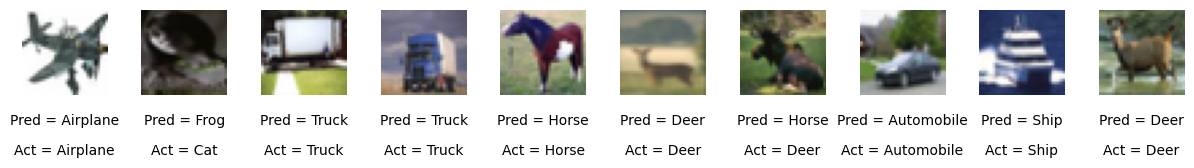

In [16]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, 
            'Pred = ' + str(preds_single[idx]), 
            fontsize = 10, 
            ha = 'center', 
            transform = ax.transAxes) 
    ax.text(0.5, -0.7, 
            'Act = ' + str(actual_single[idx]), 
            fontsize = 10, 
            ha = 'center', 
            transform = ax.transAxes)
    ax.imshow(img)

# 
# 
# 
# The End
# 
# 
# 